In [25]:
import pandas as pd
import matplotlib.pyplot as plt

## Cálculo de carga para cada nodo (+/-)

In [26]:
df_prod = pd.read_csv('dataset/mean_production.csv') #el dataset de producción de sustdata 
df_ref = pd.read_csv('dataset/new_pvwatts_hourly.csv') #el dataset de producción de global
df_cons = pd.read_csv('results/consum_25.csv') #es el único que está bien, con datos y con columna h
df_cons.head()

,Pavg,iid,datetime,h
0,2524.484150,25,2013-04-06,0.0
1,300.692617,25,2013-04-06,1.0
2,232.383467,25,2013-04-06,2.0
3,220.126917,25,2013-04-06,3.0
4,217.004100,25,2013-04-06,4.0


In [27]:
df_cons['timestamp'] = pd.to_datetime(df_cons['datetime']) + pd.to_timedelta(df_cons['h'], unit='h')
df_cons.head()

,Pavg,iid,datetime,h,timestamp
0,2524.484150,25,2013-04-06,0.0,2013-04-06 00:00:00
1,300.692617,25,2013-04-06,1.0,2013-04-06 01:00:00
2,232.383467,25,2013-04-06,2.0,2013-04-06 02:00:00
3,220.126917,25,2013-04-06,3.0,2013-04-06 03:00:00
4,217.004100,25,2013-04-06,4.0,2013-04-06 04:00:00


In [28]:
df_prod = df_prod.drop('iid', axis=1)
df_prod.head()

,solar,datetime,h
0,0.0,2010-07-01,0.0
1,0.0,2010-07-01,1.0
2,0.0,2010-07-01,2.0
3,0.0,2010-07-01,3.0
4,0.0,2010-07-01,4.0


In [29]:
df_ref.head()

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp
0,1,1,0,0,0,14.2,0.0,0.2,0.0,14.2,0.0,0.0,2010-01-01 00:00:00
1,1,1,1,0,0,14.0,0.0,0.2,0.0,14.0,0.0,0.0,2010-01-01 01:00:00
2,1,1,2,0,0,13.7,0.0,0.2,0.0,13.7,0.0,0.0,2010-01-01 02:00:00
3,1,1,3,0,0,13.5,0.0,0.2,0.0,13.5,0.0,0.0,2010-01-01 03:00:00
4,1,1,4,0,0,13.2,0.0,0.2,0.0,13.2,0.0,0.0,2010-01-01 04:00:00


### Comparación de los datos de producción (Sustdata) con los de referencia (personalizados)

In [30]:
""" plt.figure(figsize=(10, 6))
plt.plot(df_prod["datetime"], df_prod["solar"], linestyle="-")
plt.title(f"Power Production SUSTDATA (MWh)")
plt.xlabel("Timestamp")
plt.ylabel("Power (MWh)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 100 != 0:
        label.set_visible(False) """

' plt.figure(figsize=(10, 6))\nplt.plot(df_prod["datetime"], df_prod["solar"], linestyle="-")\nplt.title(f"Power Production SUSTDATA (MWh)")\nplt.xlabel("Timestamp")\nplt.ylabel("Power (MWh)")\nfor n, label in enumerate(plt.gca().xaxis.get_ticklabels()):\n    if n % 100 != 0:\n        label.set_visible(False) '

In [31]:
""" plt.figure(figsize=(10, 6))
plt.plot(df_ref["timestamp"], df_ref["DC Array Output (W)"], linestyle="-")
plt.title(f"Power Production of one node GLOBAL DATA (W)")
plt.xlabel("Timestamp")
plt.ylabel("Power (W)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 200 != 0:
        label.set_visible(False) """

' plt.figure(figsize=(10, 6))\nplt.plot(df_ref["timestamp"], df_ref["DC Array Output (W)"], linestyle="-")\nplt.title(f"Power Production of one node GLOBAL DATA (W)")\nplt.xlabel("Timestamp")\nplt.ylabel("Power (W)")\nfor n, label in enumerate(plt.gca().xaxis.get_ticklabels()):\n    if n % 200 != 0:\n        label.set_visible(False) '

In [32]:
mean_all = df_prod['solar'].mean()*1e6
mean_one = df_ref['DC Array Output (W)'].mean()

print("de todos (W): " + str(mean_all) +  ", de uno (W): " + str(mean_one))
print("nº nodos media: " + str(mean_all/mean_one))

de todos (W): 1683398.6877477563, de uno (W): 530.4314433789954
nº nodos media: 3173.640455822226


### Cálculo final de producción y diferencia por nodo 

#### SUSTDATA

In [33]:
df_merged1 = pd.merge(df_prod, df_cons, on=['datetime', 'h'], how='inner')
df_merged1.head()

,solar,datetime,h,Pavg,iid,timestamp
0,NaN,2010-10-31,NaN,NaN,25,NaT
1,NaN,2010-10-31,NaN,NaN,25,NaT
2,NaN,2010-10-31,NaN,NaN,25,NaT
3,NaN,2010-10-31,NaN,NaN,25,NaT
4,NaN,2010-10-31,NaN,NaN,25,NaT


In [34]:
df_merged1 = df_merged1.dropna() 
df_merged1.head()

,solar,datetime,h,Pavg,iid,timestamp
192,0.0,2012-08-01,0.0,164.495763,25,2012-08-01 00:00:00
193,0.0,2012-08-01,1.0,129.631658,25,2012-08-01 01:00:00
194,0.0,2012-08-01,2.0,125.548683,25,2012-08-01 02:00:00
195,0.0,2012-08-01,3.0,145.556332,25,2012-08-01 03:00:00
196,0.0,2012-08-01,4.0,149.209872,25,2012-08-01 04:00:00


In [35]:
df_merged1['dif'] = (df_merged1['solar']*1000/10) - df_merged1['Pavg']  
df_merged1.head()

,solar,datetime,h,Pavg,iid,timestamp,dif
192,0.0,2012-08-01,0.0,164.495763,25,2012-08-01 00:00:00,-164.495763
193,0.0,2012-08-01,1.0,129.631658,25,2012-08-01 01:00:00,-129.631658
194,0.0,2012-08-01,2.0,125.548683,25,2012-08-01 02:00:00,-125.548683
195,0.0,2012-08-01,3.0,145.556332,25,2012-08-01 03:00:00,-145.556332
196,0.0,2012-08-01,4.0,149.209872,25,2012-08-01 04:00:00,-149.209872


In [36]:
""" max_solar = df_merged1[df_merged1['dif'] < -3000]
max_solar.head() """

" max_solar = df_merged1[df_merged1['dif'] < -3000]\nmax_solar.head() "

#### GLOBAL DATA

In [37]:
df_ref['timestamp'] = pd.to_datetime(df_ref['timestamp'])
df_merged2 = pd.merge(df_ref, df_cons, on=['timestamp'], how='inner')
df_merged2.head()

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp,Pavg,iid,datetime,h
0,8,1,0,0,0,19.2,0.8,0.2,0.0,19.2,0.0,0.0,2012-08-01 00:00:00,164.495763,25,2012-08-01,0.0
1,8,1,1,0,0,19.1,0.3,0.2,0.0,19.1,0.0,0.0,2012-08-01 01:00:00,129.631658,25,2012-08-01,1.0
2,8,1,2,0,0,19.0,0.3,0.2,0.0,19.0,0.0,0.0,2012-08-01 02:00:00,125.548683,25,2012-08-01,2.0
3,8,1,3,0,0,18.9,0.1,0.2,0.0,18.9,0.0,0.0,2012-08-01 03:00:00,145.556332,25,2012-08-01,3.0
4,8,1,4,0,0,18.8,0.2,0.2,0.0,18.8,0.0,0.0,2012-08-01 04:00:00,149.209872,25,2012-08-01,4.0


In [38]:
df_merged2['dif_original'] = (df_merged2['DC Array Output (W)']) - df_merged2['Pavg']  
df_merged2.head()

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp,Pavg,iid,datetime,h,dif_original
0,8,1,0,0,0,19.2,0.8,0.2,0.0,19.2,0.0,0.0,2012-08-01 00:00:00,164.495763,25,2012-08-01,0.0,-164.495763
1,8,1,1,0,0,19.1,0.3,0.2,0.0,19.1,0.0,0.0,2012-08-01 01:00:00,129.631658,25,2012-08-01,1.0,-129.631658
2,8,1,2,0,0,19.0,0.3,0.2,0.0,19.0,0.0,0.0,2012-08-01 02:00:00,125.548683,25,2012-08-01,2.0,-125.548683
3,8,1,3,0,0,18.9,0.1,0.2,0.0,18.9,0.0,0.0,2012-08-01 03:00:00,145.556332,25,2012-08-01,3.0,-145.556332
4,8,1,4,0,0,18.8,0.2,0.2,0.0,18.8,0.0,0.0,2012-08-01 04:00:00,149.209872,25,2012-08-01,4.0,-149.209872


In [39]:
""" max_solar = df_merged2[df_merged2['dif_original'] < -3000]
max_solar.head() """

" max_solar = df_merged2[df_merged2['dif_original'] < -3000]\nmax_solar.head() "

#### COMPARACIÓN RESULTADOS PARA NODO 25

In [40]:
""" plt.figure(figsize=(10, 6))
plt.plot(df_merged1["timestamp"], df_merged1["dif"], linestyle="-")
plt.title(f"Power Samples Results of one node SUSTDATA (KWh)")
plt.xlabel("Timestamp")
plt.ylabel("Power (KWh)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 20 != 0:
        label.set_visible(False) """

' plt.figure(figsize=(10, 6))\nplt.plot(df_merged1["timestamp"], df_merged1["dif"], linestyle="-")\nplt.title(f"Power Samples Results of one node SUSTDATA (KWh)")\nplt.xlabel("Timestamp")\nplt.ylabel("Power (KWh)")\nfor n, label in enumerate(plt.gca().xaxis.get_ticklabels()):\n    if n % 20 != 0:\n        label.set_visible(False) '

In [41]:
""" plt.figure(figsize=(10, 6))
plt.plot(df_merged2["timestamp"], df_merged2["dif_original"], linestyle="-")
plt.title(f"Power Samples Results of one node GLOBAL (W)")
plt.xlabel("Timestamp")
plt.ylabel("Power (W)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 30 != 0:
        label.set_visible(False) """

' plt.figure(figsize=(10, 6))\nplt.plot(df_merged2["timestamp"], df_merged2["dif_original"], linestyle="-")\nplt.title(f"Power Samples Results of one node GLOBAL (W)")\nplt.xlabel("Timestamp")\nplt.ylabel("Power (W)")\nfor n, label in enumerate(plt.gca().xaxis.get_ticklabels()):\n    if n % 30 != 0:\n        label.set_visible(False) '

## SELECCIÓN DE GLOBAL DATA Y MERGE2

### APLICACIÓN DE RUIDO

In [47]:
import numpy as np
noise = np.random.normal(loc=0, scale=100, size=len(df_ref)) #creación de ruido
mask = df_ref['DC Array Output (W)'] == 0
noise[mask] = 0  #para los valores 0 no se aplica ruido

noise = np.abs(noise) #para que no salgan valores negativos
data_plus_noise = df_ref['DC Array Output (W)'] + noise

df_merged2['Prod_final'] = data_plus_noise #se añade columna a merged
df_ref['Prod_final'] = data_plus_noise #se añade columna al dataset de global

print(df_ref[['Prod_final', 'DC Array Output (W)']].head(20))

     Prod_final  DC Array Output (W)
0      0.000000                0.000
1      0.000000                0.000
2      0.000000                0.000
3      0.000000                0.000
4      0.000000                0.000
5      0.000000                0.000
6      0.000000                0.000
7      0.000000                0.000
8    284.275552              266.516
9    468.333793              304.817
10  1114.950118              956.140
11  1085.865608              926.348
12  1481.852027             1280.369
13  1710.025364             1641.658
14  1235.002835             1216.595
15   595.058612              461.121
16   287.305486              227.364
17     0.000000                0.000
18     0.000000                0.000
19     0.000000                0.000


#### CÁLCULO NUEVA COLUMNA DIFERENCIA -> CARGAS FINALES YA CON RUIDO APLICADO

In [43]:
df_merged2['dif_final'] = (df_merged2['Prod_final']) - df_merged2['Pavg']  #cálculo de nueva diferencia -> carga final a utilizar
df_merged2.head(20)

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp,Pavg,iid,datetime,h,dif_original,Prod_final,dif_final
0,8,1,0,0,0,19.2,0.8,0.2,0.000,19.200,0.000,0.000,2012-08-01 00:00:00,164.495763,25,2012-08-01,0.0,-164.495763,0.000000,-164.495763
1,8,1,1,0,0,19.1,0.3,0.2,0.000,19.100,0.000,0.000,2012-08-01 01:00:00,129.631658,25,2012-08-01,1.0,-129.631658,0.000000,-129.631658
2,8,1,2,0,0,19.0,0.3,0.2,0.000,19.000,0.000,0.000,2012-08-01 02:00:00,125.548683,25,2012-08-01,2.0,-125.548683,0.000000,-125.548683
3,8,1,3,0,0,18.9,0.1,0.2,0.000,18.900,0.000,0.000,2012-08-01 03:00:00,145.556332,25,2012-08-01,3.0,-145.556332,0.000000,-145.556332
4,8,1,4,0,0,18.8,0.2,0.2,0.000,18.800,0.000,0.000,2012-08-01 04:00:00,149.209872,25,2012-08-01,4.0,-149.209872,0.000000,-149.209872
5,8,1,5,208,28,18.9,0.1,0.2,0.000,18.900,0.000,0.000,2012-08-01 05:00:00,132.005100,25,2012-08-01,5.0,-132.005100,0.000000,-132.005100
6,8,1,6,354,100,19.3,0.0,0.2,95.130,22.753,217.695,194.127,2012-08-01 06:00:00,125.576290,25,2012-08-01,6.0,92.118710,0.000000,-125.576290
7,8,1,7,534,126,20.0,0.0,0.2,183.192,27.125,509.759,475.842,2012-08-01 07:00:00,128.791302,25,2012-08-01,7.0,380.967698,0.000000,-128.791302
8,8,1,8,527,167,21.0,0.0,0.2,354.993,35.427,1129.489,1073.612,2012-08-01 08:00:00,219.635793,25,2012-08-01,8.0,909.853207,564.205506,344.569713
9,8,1,9,233,278,22.1,0.0,0.2,402.969,38.545,1289.459,1227.914,2012-08-01 09:00:00,122.706498,25,2012-08-01,9.0,1166.752502,341.975371,219.268873


In [44]:
columns_to_drop = ['Month', 'Day', 'Hour', 'Wind Speed (m/s)', 'Albedo', 'AC System Output (W)']
df_merged2.drop(columns=columns_to_drop, inplace=True)
df_merged2.head(20)

,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),timestamp,Pavg,iid,datetime,h,dif_original,Prod_final,dif_final
0,0,0,19.2,0.000,19.200,0.000,2012-08-01 00:00:00,164.495763,25,2012-08-01,0.0,-164.495763,0.000000,-164.495763
1,0,0,19.1,0.000,19.100,0.000,2012-08-01 01:00:00,129.631658,25,2012-08-01,1.0,-129.631658,0.000000,-129.631658
2,0,0,19.0,0.000,19.000,0.000,2012-08-01 02:00:00,125.548683,25,2012-08-01,2.0,-125.548683,0.000000,-125.548683
3,0,0,18.9,0.000,18.900,0.000,2012-08-01 03:00:00,145.556332,25,2012-08-01,3.0,-145.556332,0.000000,-145.556332
4,0,0,18.8,0.000,18.800,0.000,2012-08-01 04:00:00,149.209872,25,2012-08-01,4.0,-149.209872,0.000000,-149.209872
5,208,28,18.9,0.000,18.900,0.000,2012-08-01 05:00:00,132.005100,25,2012-08-01,5.0,-132.005100,0.000000,-132.005100
6,354,100,19.3,95.130,22.753,217.695,2012-08-01 06:00:00,125.576290,25,2012-08-01,6.0,92.118710,0.000000,-125.576290
7,534,126,20.0,183.192,27.125,509.759,2012-08-01 07:00:00,128.791302,25,2012-08-01,7.0,380.967698,0.000000,-128.791302
8,527,167,21.0,354.993,35.427,1129.489,2012-08-01 08:00:00,219.635793,25,2012-08-01,8.0,909.853207,564.205506,344.569713
9,233,278,22.1,402.969,38.545,1289.459,2012-08-01 09:00:00,122.706498,25,2012-08-01,9.0,1166.752502,341.975371,219.268873


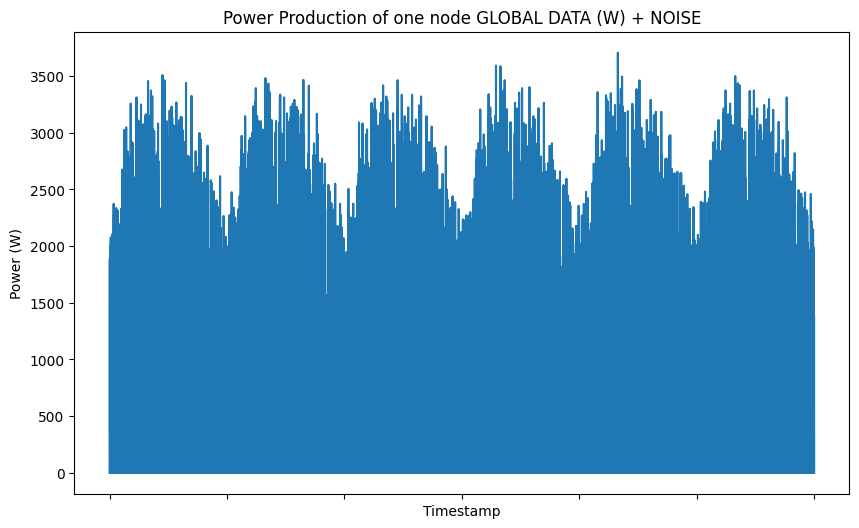

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(df_ref["timestamp"], df_ref["Prod_final"], linestyle="-")
plt.title(f"Power Production of one node GLOBAL DATA (W) + NOISE")
plt.xlabel("Timestamp")
plt.ylabel("Power (W)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 200 != 0:
        label.set_visible(False)

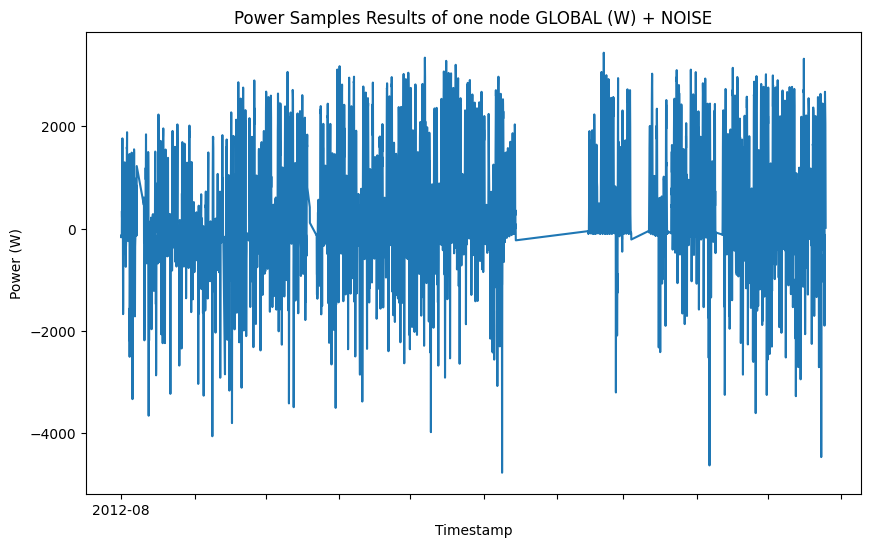

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(df_merged2["timestamp"], df_merged2["dif_final"], linestyle="-")
plt.title(f"Power Samples Results of one node GLOBAL (W) + NOISE")
plt.xlabel("Timestamp")
plt.ylabel("Power (W)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 30 != 0:
        label.set_visible(False)